# Overview on the results of the Classifiers

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import json
sys.path.append('../scripts')

import ml_evaluation as mle
import ml_helper as mlh

## Training Accuracies

### RNN

Mensch best accuracy: 0.472
Fruchtfliege best accuracy: 0.5019
E.Coli best accuracy: 0.5253


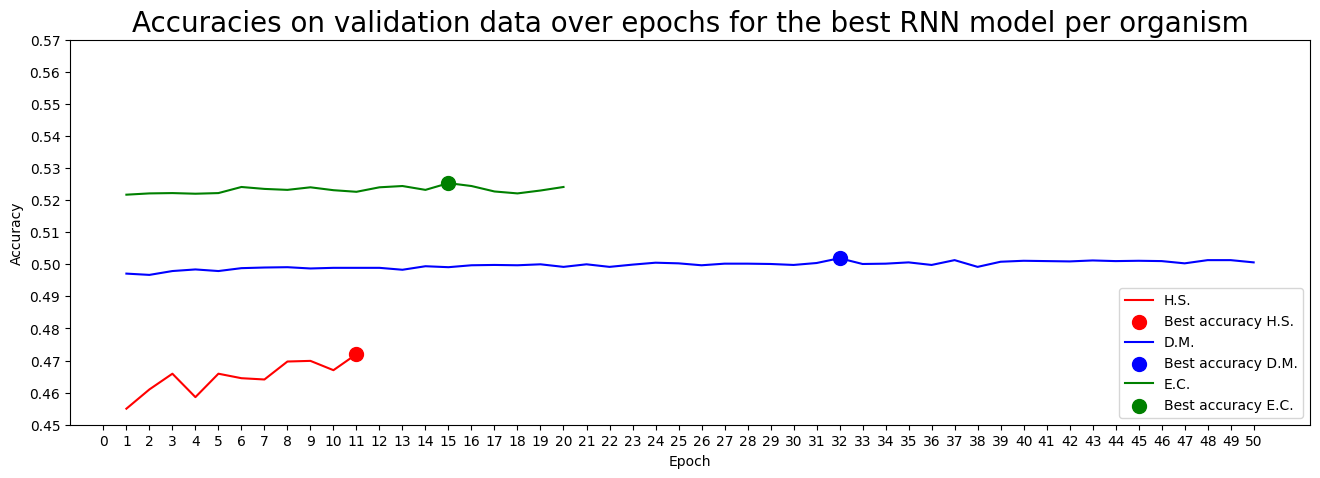

In [3]:
accuracies_per_epoch_rnn = mlh.from_pickle('../data/epoch_accuracies_rnn.pkl')
mle.plot_training_accuracies(accuracies_per_epoch_rnn, 'RNN', 1)

### Encoder

In [4]:
training_accuracies_ecoli = mlh.from_pickle('../data/E.Coli/training_results_encoder.pkl')["all_accuracies"]
training_accuracies_fruchtfliege = mlh.from_pickle('../data/Drosophila.Melanogaster/training_results_encoder.pkl')["all_accuracies"]
training_accuracies_mensch = mlh.from_pickle('../data/Homo.Sapiens/training_results_encoder.pkl')["all_accuracies"]

E.Coli best accuracy: 0.525
Fruchtfliege best accuracy: 0.5319
Mensch best accuracy: 0.5331


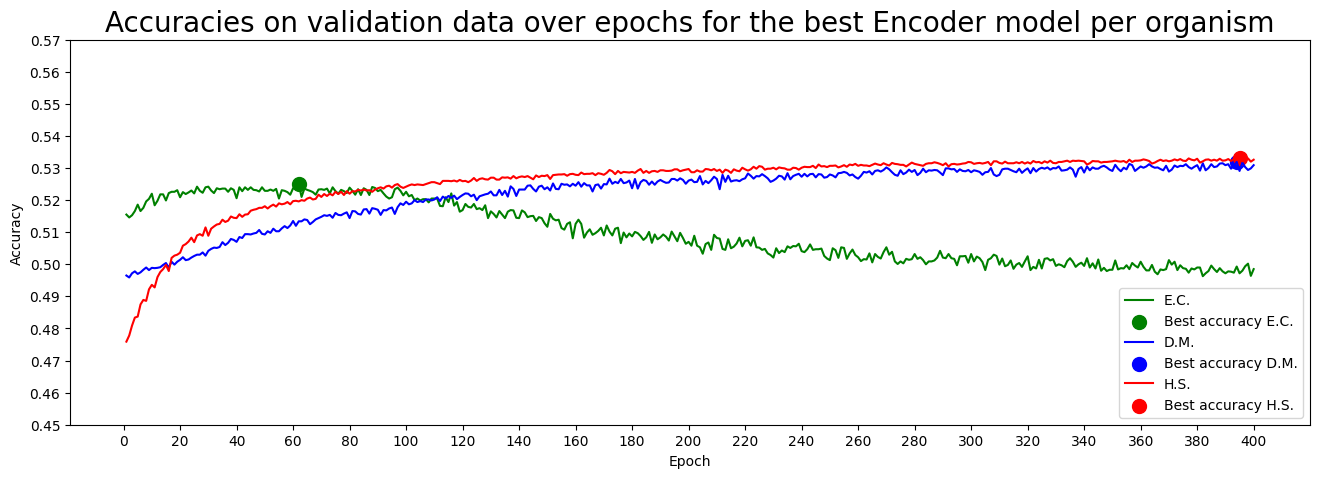

In [5]:
training_accuracies = {
    "E.Coli": training_accuracies_ecoli,
    "Fruchtfliege": training_accuracies_fruchtfliege,
    "Mensch": training_accuracies_mensch
}
mle.plot_training_accuracies(training_accuracies, 'Encoder', 20)

### TCN

In [6]:
with open('../data/E.Coli/tcnn_training_valid_accs.json', 'r') as file:
    training_accuracies_ecoli_tcnn = json.load(file)['training_valid_accs']
with open('../data/Drosophila.Melanogaster/tcnn_training_valid_accs.json', 'r') as file:
    training_accuracies_fruchtfliege_tcnn = json.load(file)['training_valid_accs']
with open('../data/Homo.Sapiens/tcnn_training_valid_accs.json', 'r') as file:
    training_accuracies_mensch_tcnn = json.load(file)['training_valid_accs']

E.Coli best accuracy: 0.5543214016917674
Fruchtfliege best accuracy: 0.546198613880075
Mensch best accuracy: 0.5500983389613922


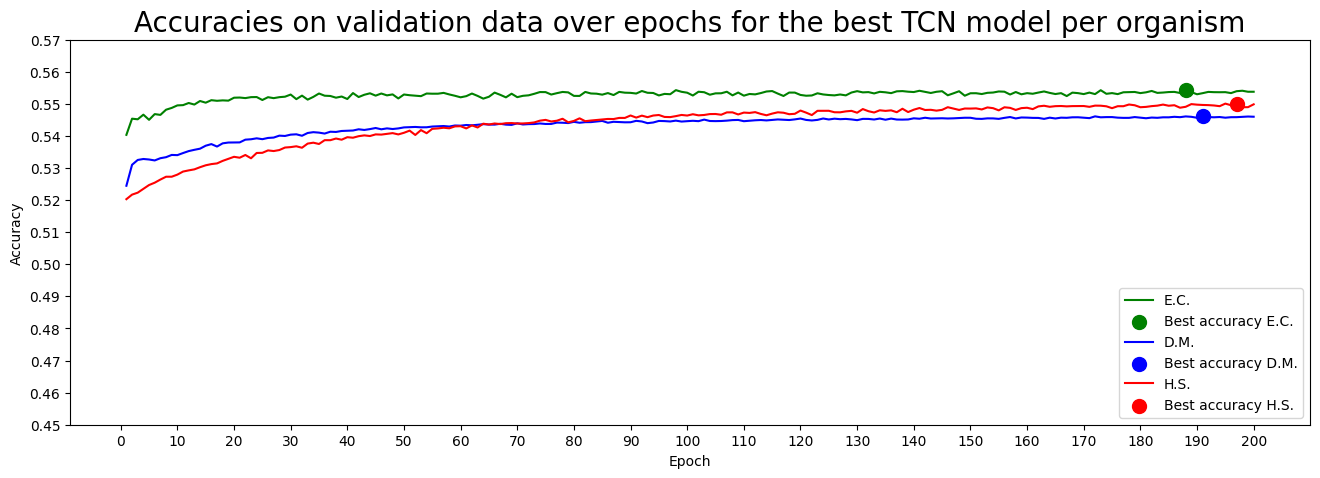

In [7]:
training_accuracies_tcnn = {
    "E.Coli": training_accuracies_ecoli_tcnn,
    "Fruchtfliege": training_accuracies_fruchtfliege_tcnn,
    "Mensch": training_accuracies_mensch_tcnn
}
mle.plot_training_accuracies(training_accuracies_tcnn, 'TCN', 10)

## Test Data

### Encoder Model vs. Max CUB

In [9]:
accuracies_encoder = {
    "E.Coli": {
        "Max CUB": 0.5186,
        "Encoder": 0.5270
    },
    "Drosophila.Melanogaster": {
        "Max CUB": 0.4917,
        "Encoder": 0.5296
    },
    "Homo.Sapiens": {
        "Max CUB": 0.438,
        "Encoder": 0.5356
    }
}
classifier_labels = ["Max CUB Classifier", "Encoder Classifier"]
title = "Accuracy comparison of the Encoder model classifier\nwith the Max CUB Classifier for all analyzed organisms"

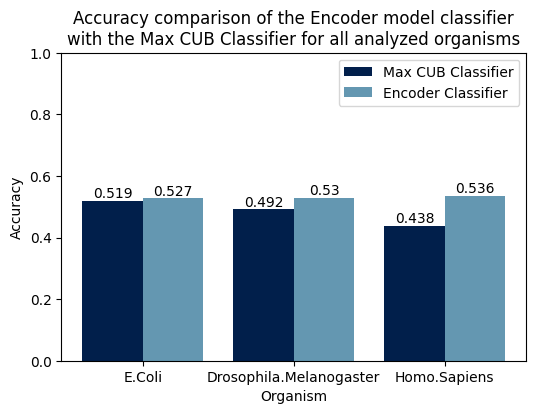

In [10]:
mle.plot_accuracies_comparison(accuracies_encoder, classifier_labels, title)

### RNN Model vs. Max CUB

In [11]:
accuracies_rnn = {
    "E.Coli": {
        "Max CUB": 0.5186,
        "RNN": 0.5256,
    },
    "Drosophila.Melanogaster": {
        "Max CUB": 0.4917,
        "RNN": 0.4969,
    },
    "Homo.Sapiens": {
        "Max CUB": 0.438,
        "RNN": 0.4583,
    }
}
classifier_labels = ["Max CUB Classifier", "RNN Classifier"]
title = "Accuracy comparison of the RNN model classifier\nwith the Max CUB Classifier for all analyzed organisms"

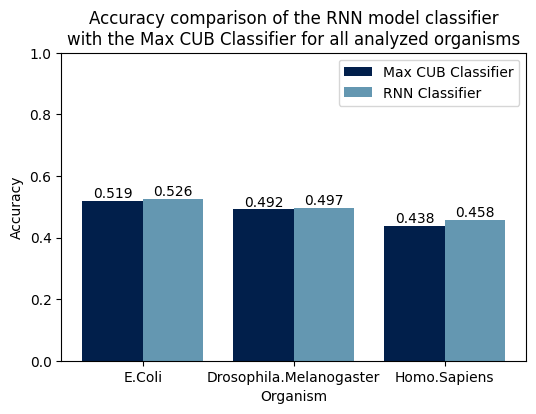

In [12]:
mle.plot_accuracies_comparison(accuracies_rnn, classifier_labels, title)

### TCN Model vs. Max CUB

In [8]:
accuracies_tcnn = {
    "E.Coli": {
        "Max CUB": 0.5186,
        "TCNN": 0.5552,
    },
    "Drosophila.Melanogaster": {
        "Max CUB": 0.4917,
        "TCNN": 0.5360,
    },
    "Homo.Sapiens": {
        "Max CUB": 0.438,
        "TCNN": 0.5637,
    }
}
classifier_labels = ["Max CUB Classifier", "TCN Classifier"]
title = "Accuracy comparison of the TCN model classifier\nwith the Max CUB Classifier for all analyzed organisms"

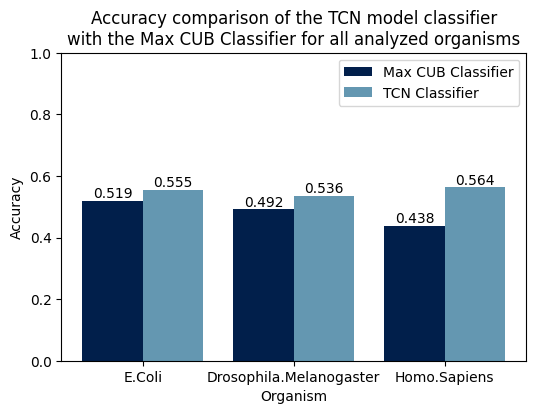

In [9]:
mle.plot_accuracies_comparison(accuracies_tcnn, classifier_labels, title)

### Index-based Max CUB vs. Max CUB

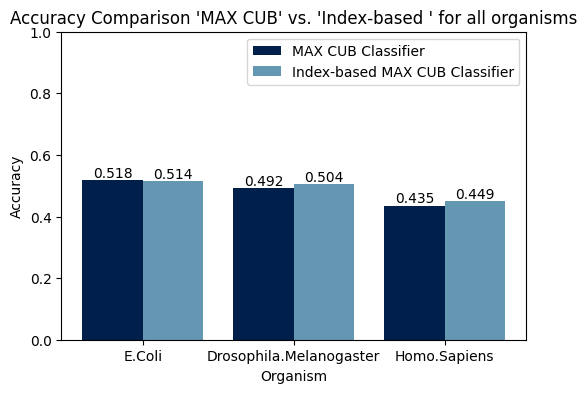

In [15]:
accuracies_max_i_cub = {
    "E.Coli": {
        "MAX CUB": 0.5184,
        "Indexbased MAX CUB": 0.5143
    },
    "Drosophila.Melanogaster": {
        "MAX CUB": 0.4915,
        "Indexbased MAX CUB": 0.5043
    },
    "Homo.Sapiens": {
        "MAX CUB": 0.4353,
        "Indexbased MAX CUB": 0.4491
    }
}

labels = ['MAX CUB Classifier', 'Index-based MAX CUB Classifier']
title = 'Accuracy Comparison \'MAX CUB\' vs. \'Index-based \' for all organisms'
mle.plot_accuracies_comparison(accuracies_max_i_cub, labels, title)

## Shuffled test data

### Encoder Model

In [16]:
accuracies_normal_shuffled = {
    "E.Coli": {
        "Normal Testdata": 0.5270,
        "Shuffled Testdata": 0.5265
    },
    "Drosophila.Melanogaster": {
        "Normal Testdata": 0.5296,
        "Shuffled Testdata": 0.4821
    },
    "Homo.Sapiens": {
        "Normal Testdata": 0.5356,
        "Shuffled Testdata": 0.4696
    }
}
classifier_labels = ["Normal test data", "Shuffled test data"]
title = "Comparison of the accuracies of the Encoder model classifier\ncalculated on the actual and shuffled test data\nfor all analyzed organisms"

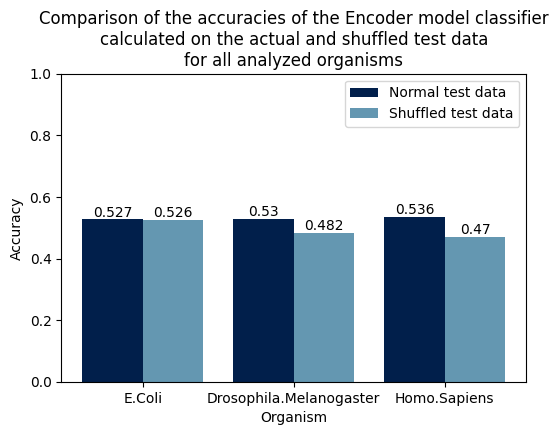

In [17]:
mle.plot_accuracies_comparison(accuracies_normal_shuffled, classifier_labels, title)

### RNN Model

In [18]:
accuracies_rnn_shuffled = {
    "E.Coli": {
        "RNN": 0.5256,
        "RNN_shuffled": 0.5096,
    },
    "Fruchtfliege": {
        "RNN": 0.4969,
        "RNN_shuffled": 0.4832,
    },
    "Mensch": {
        "RNN": 0.4583,
        "RNN_shuffled": 0.4515,
    }
}
classifier_labels = ["Normal test data", "Shuffled test data"]
title = "Comparison of the accuracies of the RNN model classifier\ncalculated on the actual and shuffled test data\nfor all analyzed organisms"

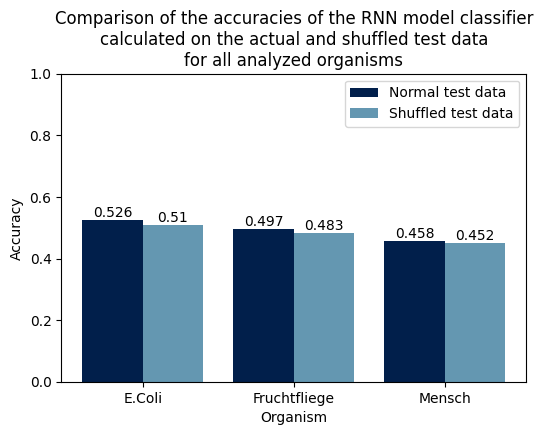

In [19]:
mle.plot_accuracies_comparison(accuracies_rnn_shuffled, classifier_labels, title)

### TCN Model

In [10]:
accuracies_tcnn_shuffled = {
    "E.Coli": {
        "TCNN": 0.5552,
        "TCNN_shuffled": 0.4980,
    },
    "Fruchtfliege": {
        "TCNN": 0.5360,
        "TCNN_shuffled": 0.4621,
    },
    "Mensch": {
        "TCNN": 0.5637,
        "TCNN_shuffled": 0.4228,
    }
}
classifier_labels = ["Normal test data", "Shuffled test data"]
title = "Comparison of the accuracies of the TCN model classifier\ncalculated on the actual and shuffled test data\nfor all analyzed organisms"

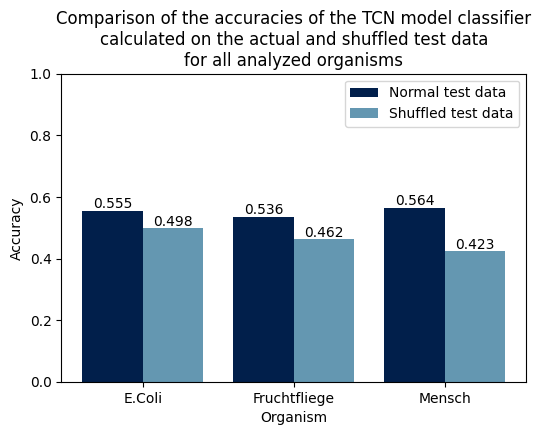

In [11]:
mle.plot_accuracies_comparison(accuracies_tcnn_shuffled, classifier_labels, title)

## Index-based Max CUB Threshold

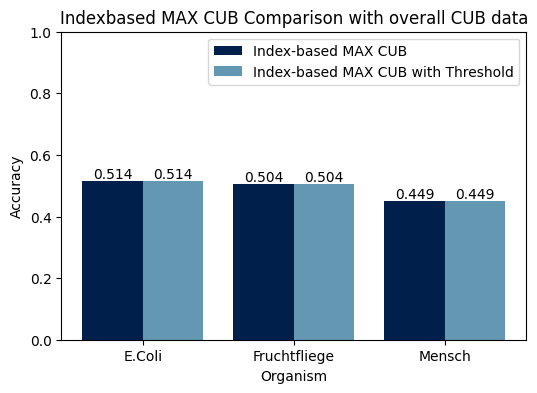

In [22]:
accuracies_max_i_cub_treshold = {
    "E.Coli": {
        "Indexbased MAX CUB": 0.5143,
        "Indexbased MAX CUB with Threshold": 0.5138,
    },
    "Fruchtfliege": {
        "Indexbased MAX CUB": 0.5043,
        "Indexbased MAX CUB with Threshold": 0.5042,
    },
    "Mensch": {
        "Indexbased MAX CUB": 0.44908,
        "Indexbased MAX CUB with Threshold": 0.44906,
    }
}
max_i_cub_treshold_labels = ['Index-based MAX CUB', 'Index-based MAX CUB with Threshold']
max_i_cub_threshold_title = 'Indexbased MAX CUB Comparison with overall CUB data'
mle.plot_accuracies_comparison(accuracies_max_i_cub_treshold,max_i_cub_treshold_labels,max_i_cub_threshold_title)

## All Accuracies in comparison

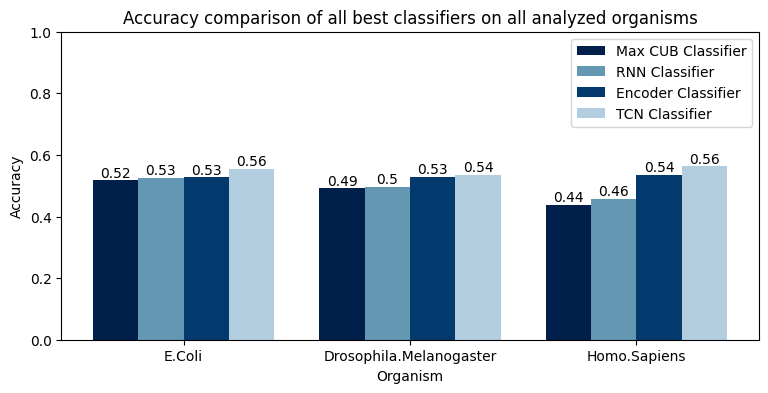

In [12]:
accuracies_all = {
    "E.Coli": {
        "Max CUB": 0.5186,
        "RNN": 0.5256,
        "Encoder": 0.5270,
        "TCN": 0.5552
    },
    "Drosophila.Melanogaster": {
        "Max CUB": 0.4917,
        "RNN": 0.4969,
        "Encoder": 0.5296,
        "TCN": 0.5360
    },
    "Homo.Sapiens": {
        "Max CUB": 0.438,
        "RNN": 0.4583,
        "Encoder": 0.5356,
        "TCN": 0.5637
    }
}
classifier_labels = ["Max CUB Classifier", "RNN Classifier", "Encoder Classifier", "TCN Classifier"]
title = "Accuracy comparison of all best classifiers on all analyzed organisms"

mle.plot_accuracies_comparison(accuracies_all, classifier_labels, title, 2)

In [82]:
%autoreload

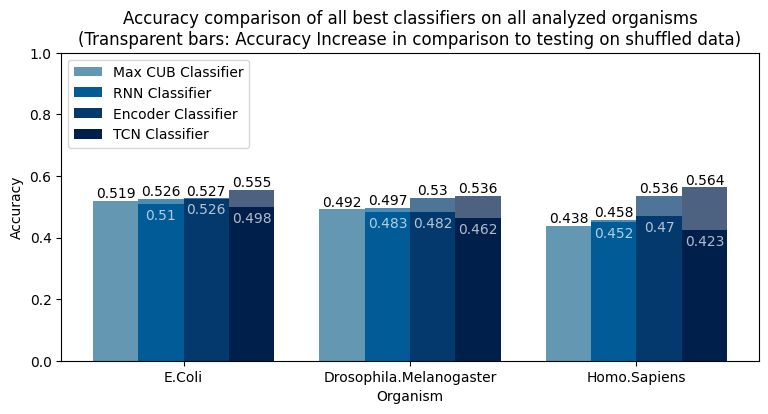

In [13]:
accuracies_all_plus_shuffled = {
    "E.Coli": {
        "Max CUB": (0.5186,0.5186),
        "RNN": (0.5256,0.5096),
        "Encoder": (0.5270,0.5265),
        "TCN": (0.5552,0.4980)
    },
    "Drosophila.Melanogaster": {
        "Max CUB": (0.4917,0.4917),
        "RNN": (0.4969,0.4832),
        "Encoder": (0.5296,0.4821),
        "TCN": (0.5360,0.4621)
    },
    "Homo.Sapiens": {
        "Max CUB": (0.438,0.438),
        "RNN": (0.4583,0.4515),
        "Encoder": (0.5356,0.4696),
        "TCN": (0.5637,0.4228)
    }
}

classifier_labels = ["Max CUB Classifier", "RNN Classifier", "Encoder Classifier", "TCN Classifier"]
title = "Accuracy comparison of all best classifiers on all analyzed organisms\n(Transparent bars: Accuracy Increase in comparison to testing on shuffled data)"

mle.plot_accuracies_comparison_shuffled(accuracies_all_plus_shuffled, classifier_labels, title, 3)

In [62]:
# Calculate procental improvement to baseline
for organism in accuracies_all:
    baseline = accuracies_all[organism]["Max CUB"]
    print("")
    print(organism)
    for model in list(accuracies_all[organism].keys())[1:]:
        improvement = round((100 / baseline * accuracies_all[organism][model]) - 100, 1)
        print(f"{model}: {improvement}% improvement to baseline")


E.Coli
RNN: 1.3% improvement to baseline
Encoder: 1.6% improvement to baseline
TCNN: 7.1% improvement to baseline

Drosophila.Melanogaster
RNN: 1.1% improvement to baseline
Encoder: 7.7% improvement to baseline
TCNN: 9.0% improvement to baseline

Homo.Sapiens
RNN: 4.6% improvement to baseline
Encoder: 22.3% improvement to baseline
TCNN: 28.7% improvement to baseline


In [25]:
# Threshold bei < 10 
# Prediction Accuracy for  E.Coli :  0.5142616255292535
# Prediction Accuracy for  E.Coli  after Threshold:  0.5138437744648432
#
# Prediction Accuracy for  Drosophila.Melanogaster :  0.5043409761504078
# Prediction Accuracy for  Drosophila.Melanogaster  after Threshold:  0.5042540395735733
#
# Prediction Accuracy for  Homo.Sapiens :  0.44908564387850225
# Prediction Accuracy for  Homo.Sapiens  after Threshold:  0.44906156044722767